In [206]:
pip install spotipy

ERROR: Could not find a version that satisfies the requirement spotipyx (from versions: none)
ERROR: No matching distribution found for spotipyx
Note: you may need to restart the kernel to use updated packages.


In [192]:
import requests
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import pandas as pd
import matplotlib.pyplot as plt

In [193]:
CLIENT_ID= "a1476dc64aa24f369180bd2ffcfd3901"
CLIENT_SECRET="cb078bc64c1f4d44aba2263313793e70"
SPOTIPY_REDIRECT_URI="http://127.0.0.1:9090"
SCOPE = "user-top-read"

In [194]:
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=CLIENT_ID, client_secret=CLIENT_SECRET, redirect_uri=SPOTIPY_REDIRECT_URI, scope=SCOPE))

### Defining functions to acquire data and pick out the parts we want 

In [195]:
def get_track_ids(time_frame):
    '''
    Purpose: The function gets the track IDS from the meta data that is provided when using the 
    spotipy "current_user_top_tracks" build in function from the WEB API
    Param: time_frame: str
    Return: list[str]
    '''
    track_ids = []
    for song in time_frame['items']:
        track_ids.append(song['id'])
    return track_ids


In [196]:

def get_track_info(id):
    '''
    Purpose: Using the track ID, use the spotipy "track" function to find more information
    about it such as name, album, artist, populatiry and create a list from that 
    Param: id -> int
    Return: track_info -> list
    '''
    info = sp.track(id)
    name  = info['name']
    album = info['album']['name']
    artist = info['album']['artists'][0]['name']
    artist_id = info['album']['artists'][0]['id']
    artist_info = sp.artist(artist_id)
    genre = artist_info['genres']
    track_info = [name, album, artist, genre]
    return track_info


In [197]:
def convert_to_df(track_ids):
    '''
    Purpose: Function converts the infomation from the list to a dataframe using Pandas
    Writes the dataframe to a CSV file
    Param: track_ids: lst, time_peiod: str
    Return: NONE
    '''
    #loops over all tracks 
    tracks = []
    for i in range(len(track_ids)):
        #calls get_track_info passing in the track id
        track_inf = get_track_info(track_ids[i])
        tracks.append(track_inf)
    df = pd.DataFrame(tracks, columns = ["NAME", "ALBUM", "ARTIST", "GENRE"])
    return df
    #df.to_csv(f'spotify-{time_period}.csv')





In [203]:
#['short_term', 'medium_term', 'long_term'] -> options for time ranges

top_tracks = sp.current_user_top_tracks(limit=20, offset=0, time_range= "long_term")
track_ids = get_track_ids(top_tracks)
df = convert_to_df(track_ids)
#convert_to_df(track_ids, time)

    

,NAME,ALBUM,ARTIST,GENRE
0,Congratulations (feat. Bilal),The Divine Feminine,Mac Miller,"[hip hop, pittsburgh rap, rap]"
1,Otis,Watch The Throne (Deluxe),JAY-Z,"[east coast hip hop, hip hop, rap]"
2,Bound 2,Yeezus,Kanye West,"[chicago rap, rap]"
3,Pepas,Pepas,Farruko,"[latin, latin hip hop, reggaeton, trap latino]"
4,Leray,A Love Letter To You 4,Trippie Redd,"[melodic rap, rap, trap]"
5,All Falls Down,The College Dropout,Kanye West,"[chicago rap, rap]"
6,Foreplay,Foreplay,Jalen Santoy,"[north carolina hip hop, underground hip hop]"
7,Heartless,808s & Heartbreak,Kanye West,"[chicago rap, rap]"
8,Beggin',Chosen,Måneskin,"[indie rock italiano, italian pop]"
9,Golden Boy,Nadav Guedj,Nadav Guedj,"[eurovision, israeli pop]"


# Top 20 Most Listened To Songs

In [ ]:
df

In [199]:
def create_genre_dict():
    genre_dict = {}
    for genres in df["GENRE"]:
        for genre in genres:
            if len(genre) == 0:
                continue
            if genre not in genre_dict:
                genre_dict[genre] = 1
            else:
                genre_dict[genre] += 1
    return genre_dict


In [200]:
genre_dict = create_genre_dict()

In [201]:
genres = list(genre_dict.keys())
counts = list(genre_dict.values())
sum_counts = sum(counts)
percent_of_whole = []
for count in counts:
    percent_of_whole.append((count/sum_counts) * 100)


# Top Genres Pie Chart

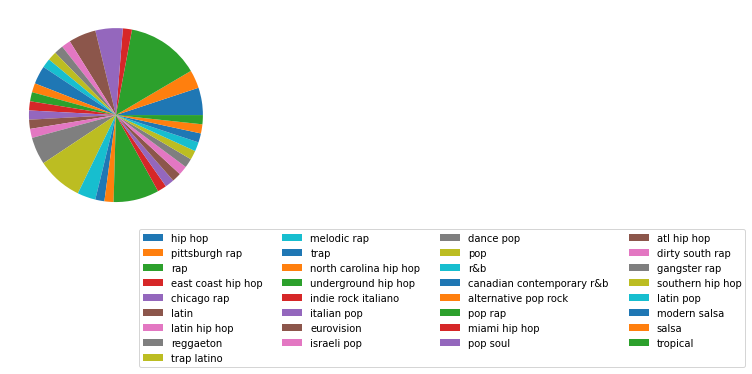

In [202]:
plt.pie(percent_of_whole)
#%matplotlib qt
plt.legend(genres, ncol = 4, loc = 'upper center', bbox_to_anchor = (2,0))
plt.show()